## Data Prepocessing

In [1]:
# Import the relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency, ttest_1samp, ttest_ind

In [2]:
# Load dataset into a DataFrame
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
# Display the first five entries of the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Size of the data
df.shape

(1000, 8)

In [5]:
# Explore each variable and its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Measures of Central Tendency & Dispersion

In [6]:
# Explore the mean and standard deviation of numerical variables
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Hypothesis Testing

Hypothesis testing is a statistical technique that tests whether a hypothesis made about a sample or population is either true or false or make inferences and conclusions about a population based on a data sample. The null hypothesis, Ho, states that there is no significant difference between the population parameter and a hypothesised value. The alternative hypothesis, Ha, represents the claim that you want to test. Asignificance level is selected which represents the prpobability of making a Type I error, which is rejecting the null hypothesis when it is true. In this anaysis, the significnce chosen is 0.05. That is, for a given hypothesis, if the p-value is less than 0.05, then the null hypothesis is rejected.

## Hypothesis 1
There is no significant disparity between a student's performance in any skills - reading, writing or math.

Ho - There is no difference in the students' performance between reading, writing and math skills.

Ha - There is a difference in the students' performance between reading, writing and math skills.

A one-way ANOVA test is used to test the hypothesis.

C:\Users\User\AppData\Local\Temp\ipykernel_14600\997824546.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'], label = 'math score')
C:\Users\User\AppData\Local\Temp\ipykernel_14600\997824546.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'], label = 'read

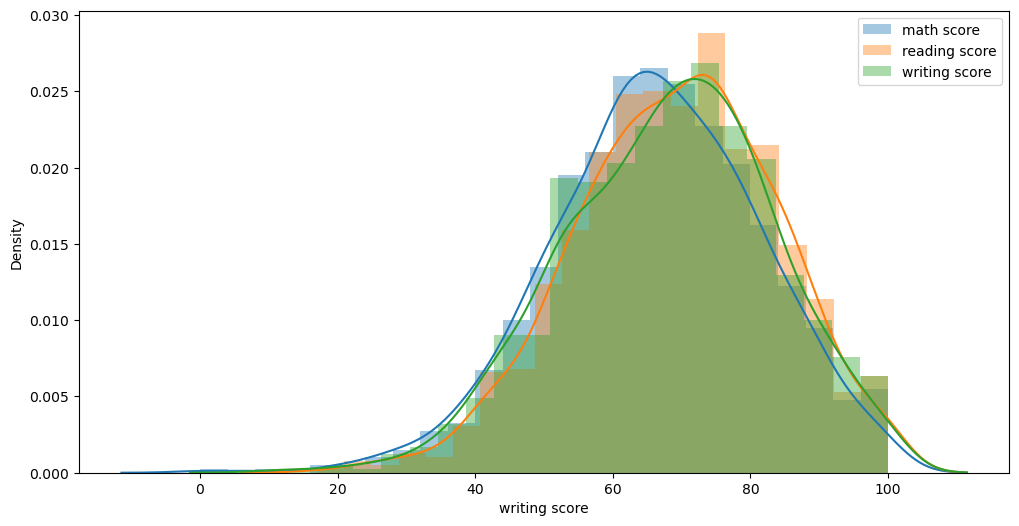

In [7]:
# Plot comparative histograms of each variable
plt.figure(figsize = (12,6))
sns.distplot(df['math score'], label = 'math score')
sns.distplot(df['reading score'], label = 'reading score')
sns.distplot(df['writing score'], label = 'writing score')
plt.legend()


Visually, it appears that all three samples have the same population mean thus no significant difference between them. The one-way ANOVA test will either support or invalidate this observation.

In [8]:
# Applying one way ANOVA test
one_way_anova_test = f_oneway(df['reading score'], df['math score'], df['writing score'])
print(f"P-Value for One Way ANOVA Test is - {one_way_anova_test.pvalue}")


P-Value for One Way ANOVA Test is - 2.0701893192229333e-05


The p-value in the hypothesis is 0.00207, which is much lower than the significance level of 0.05. It means that there is a difference between the scores of each skill, and the null hypothesis can be rejected. If the null hypothesis in the ANOVA test is rejected, then we conclude that at least one of the population means is different. However, information is not given about which means are different.

## Hypothesis 2
The students achieve a mean score of 70 or above on average.

Ho - The overall performance of the students is 70 or above. 

Ha - The overall performance of the students is less than 70.

The one-sample t-test (one-sided) to test this hypothesis as we want to compare the sample mean to that claimed to be the population's.

C:\Users\User\AppData\Local\Temp\ipykernel_14600\1105413806.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['overall_performance'])


<Axes: xlabel='overall_performance', ylabel='Density'>

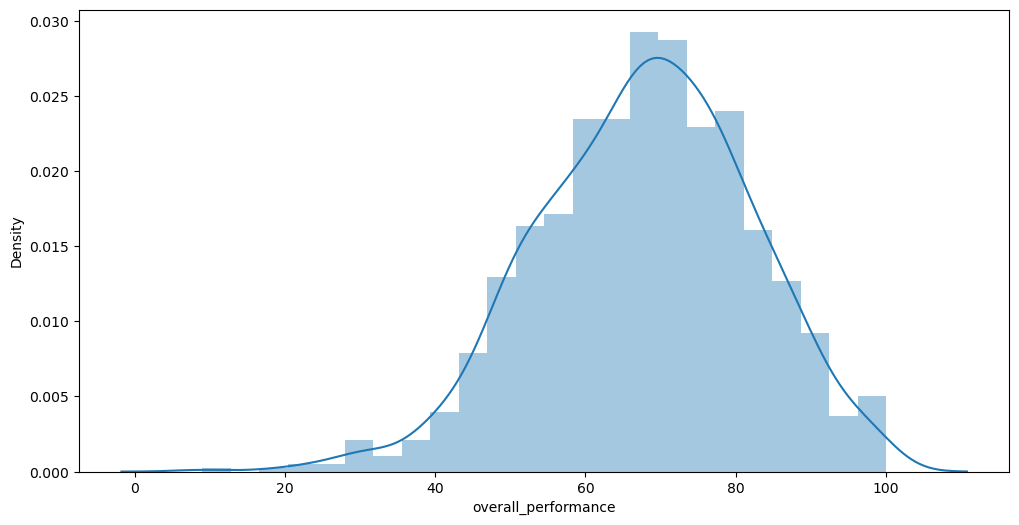

In [10]:
# Histogram of overall performance
df['overall_performance'] = (df['reading score'] + df['writing score'] + df['math score'])/3

plt.figure(figsize = (12,6))
sns.distplot(df['overall_performance'])

The histogram above shows that the mean sample is approximately 67, and most of the values are spread around 50-90. The one sample t-test will confirm whether this is random or it is representative of the larger population.

In [11]:
# apply one sample t-test on the sample overall performance
ttest_1samp(a = df['overall_performance'], popmean = 70)


TtestResult(statistic=-4.944665643928837, pvalue=8.942878479352005e-07, df=999)

As the observed p-value is much lower than the significance level, providing enough evidence to reject the null hypothesis in favor of the alternative hypothesis.

## Hypothesis 3
There is no significant difference in the mean math scores of students who have taken test preparation and those who have not taken any test preparation.
 
Ho -  There is no difference in students' math scores, whether or not they have taken test preparation.

Ha -  There is a in students' math scores, depending on whether they have taken test preparation or not.

In [12]:
# Explore mean of both samples
print('Mean Math Score of Students With Test Preparation is - {}'.format(df[df['test preparation course'] == 'completed']['math score'].mean()))
print('Mean Math Score of Students Without Test Preparation is - {}'.format(df[df['test preparation course'] == 'none']['math score'].mean()))

Mean Math Score of Students With Test Preparation is - 69.69553072625699
Mean Math Score of Students Without Test Preparation is - 64.0778816199377


The average math score is higher in the case of the students who have completed the test preparation course as shown above. A two-sample t-test to check whether this is by chance or whether these are statistically significant.

In [13]:
# apply two sample t-test
ttest_ind(df[df['test preparation course'] == 'completed']['math score'], df[df['test preparation course'] == 'none']['math score'])


Ttest_indResult(statistic=5.704616417349102, pvalue=1.5359134607147415e-08)

As the observed p-value is smaller than the significance level of 0.05, providing strong evidence to reject the null hypothesis in for the alternative.

## Hypothesis 4
There is no relationship between the gender of a student and their academic performance. 

Ho - There is no relationship between the gender of a student and their academic performance.

Ha - There is a relationship between the gender of a student and their academic performance.

A  new dichotomous feature representing whether a student failed or passed will be created and the average of all three scores will be determined. If the score is above 40, then we will consider the student as passed. As these are categorical variables, we will use the chi-square test of independence to test the significance between these two variables.

In [17]:
# Create a new feature representing whether student passed or not
df['pass_rate'] = df['overall_performance'].apply(lambda i : 'Pass' if i >= 40 else 'Fail')
# create a contingency table based on the two categorical variables for the chi-square test.
contigency_table = pd.crosstab(df['gender'], df['pass_rate'], margins = True)
contigency_table


pass_rate,Fail,Pass,All
gender,,,
female,16,502,518
male,14,468,482
All,30,970,1000


In [15]:
# extract data for students of both genders
female_data = contigency_table.iloc[0, :].values[0 : 2].tolist()
male_data = contigency_table.iloc[1, :].values[0 : 2].tolist()

# apply chi-square test
chi_square_test = chi2_contingency([female_data, male_data])
print(f"P-Value for Chi Square Test is - {chi_square_test[1]}")


P-Value for Chi Square Test is - 1.0


Since our observed p-value is less than the significance level, then we can’t reject our null hypothesis.
